In [1]:
import pandas as pd
import numpy as np

In [2]:
transactions_file = "/Users/ryotayamaoka/Desktop/kpmg_mod2/cleaned_transactions.csv"
customer_dem_file = "/Users/ryotayamaoka/Desktop/kpmg_mod2/cleaned_customer_demographic.csv"
customer_addr_file = "/Users/ryotayamaoka/Desktop/kpmg_mod2/cleaned_customer_address.csv"
new_customer_file = "/Users/ryotayamaoka/Desktop/kpmg_mod2/cleaned_new_customer_list.csv"

In [3]:
df_transactions = pd.read_csv(transactions_file)
df_customer_dem = pd.read_csv(customer_dem_file)
df_customer_addr = pd.read_csv(customer_addr_file)
df_new_customer = pd.read_csv(new_customer_file)

In [4]:
%%capture
! pip install seaborn

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [6]:
df_transactions['transaction_date'] = pd.to_datetime(df_transactions['transaction_date'])
df_customer_dem['DOB'] = pd.to_datetime(df_customer_dem['DOB'], format="%Y-%m-%d")
df_new_customer['DOB'] = pd.to_datetime(df_new_customer['DOB'], format="%Y-%m-%d")

In [7]:
df_customer_dem['DOB']

0      1953-10-12
1      1980-12-16
2      1954-01-20
3      1961-10-03
4      1977-05-13
          ...    
3995   1975-08-09
3996   2001-07-13
3997   1977-07-12
3998   1973-10-24
3999   1991-11-05
Name: DOB, Length: 4000, dtype: datetime64[ns]

In [8]:
df_age = 2020 - df_customer_dem['DOB'].dt.year
df_customer_dem['age'] = df_age
df_customer_dem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,67
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,40
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15,66
3,4,Talbot,NaN,M,33,1961-10-03,Business Systems Development Analyst,IT,Mass Customer,N,No,7,59
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,Manufacturing,Affluent Customer,N,Yes,8,43


In [9]:
df_customer_dem[['past_3_years_bike_related_purchases', 'age']].corr()

,past_3_years_bike_related_purchases,age
past_3_years_bike_related_purchases,1.000000,-0.028871
age,-0.028871,1.000000


In [10]:
df_age = 2020 - df_new_customer['DOB'].dt.year
df_new_customer['age'] = df_age
df_new_customer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,Chickie,Brister,M,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,63
1,Morly,Genery,M,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,50
2,Ardelis,Forrester,F,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,46
3,Lucine,Stutt,F,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,41
4,Melinda,Hadlee,F,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,55


In [11]:
df_new_customer.to_csv('cleaned_new_customer_list.csv', index=False)
df_customer_dem.to_csv('cleaned_customer_demographic.csv', index=False)

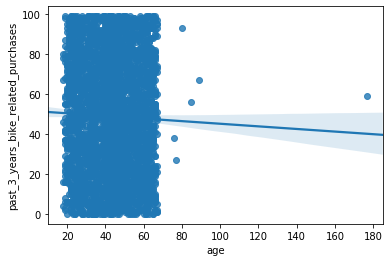

In [12]:
sns.regplot(x="age", y='past_3_years_bike_related_purchases', data=df_customer_dem)

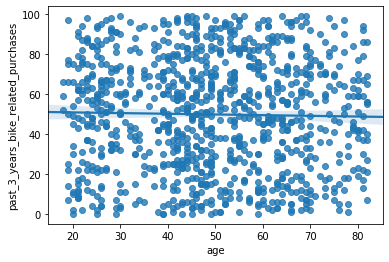

In [13]:
sns.regplot(x="age", y='past_3_years_bike_related_purchases', data=df_new_customer)

In [14]:
df_transactions.describe()

,transaction_id,product_id,customer_id,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,45.36465,1738.246050,1107.829449,554.400751,37823.508750
std,5773.647028,30.75359,1011.951046,582.825242,404.288343,4734.747044
min,1.000000,0.00000,1.000000,12.010000,7.210000,0.000000
25%,5000.750000,18.00000,857.750000,575.270000,215.140000,35560.000000
50%,10000.500000,44.00000,1736.000000,1163.890000,464.720000,38206.000000
75%,15000.250000,72.00000,2613.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,2091.470000,1759.850000,42710.000000


In [15]:
df_customer_dem.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,age
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,48.890000,10.425250,42.970000
std,1154.844867,28.715005,5.810108,12.656427
min,1.000000,0.000000,0.000000,18.000000
25%,1000.750000,24.000000,6.000000,34.000000
50%,2000.500000,48.000000,10.000000,43.000000
75%,3000.250000,73.000000,15.000000,52.000000
max,4000.000000,99.000000,22.000000,177.000000


In [16]:
df_customer_addr.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [17]:
df_new_customer.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value,age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881714,49.203000
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293525,16.928389
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000,18.000000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649531,37.750000
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000,49.000000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000,63.000000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750,82.000000


In [18]:
df_transactions.describe(include=['object'])

,online_order,order_status,brand,product_line,product_class,product_size
count,19640,20000,20000,20000,20000,20000
unique,2,2,6,4,3,3
top,True,Approved,Solex,Standard,medium,medium
freq,9829,19821,4450,14373,14023,13187


In [19]:
df_customer_dem.describe(include=['object'])

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car
count,4000,3875,4000,4000,4000,4000,4000,4000
unique,3139,3725,3,195,9,3,2,2
top,Max,Pristnor,F,Business Systems Development Analyst,Manufacturing,Mass Customer,N,Yes
freq,5,3,2039,551,1455,2000,3998,2024


In [20]:
df_customer_addr.describe(include=['object'])

,address,state,country
count,3999,3999,3999
unique,3996,3,1
top,3 Mariners Cove Terrace,NSW,Australia
freq,2,2140,3999


In [21]:
df_new_customer.describe(include=['object'])

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,state,country
count,1000,971,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,940,961,3,184,9,3,1,2,1000,3,1
top,Rozamond,Sturch,F,Associate Professor,Financial Services,Mass Customer,N,No,27429 Dottie Plaza,NSW,Australia
freq,3,2,513,121,368,508,1000,507,1,506,1000
